In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
#matplotlib 패키지 한글 깨짐 처리 시작
import matplotlib.pyplot as plt
import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic')
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm
        #fm._rebuild()
        plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
#matplotlib 패키지 한글 깨짐 처리 끝

In [2]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# from matplotlib import font_manager, rc
# import matplotlib.pyplot as plt
# plt.rc('font', family = 'Malgun Gothic')

In [4]:
with open("/content/drive/MyDrive/data2.pickle","rb") as fr:
    data = pickle.load(fr)

In [5]:
data['최종등급'] = data['금액등급'].apply(lambda x : str(x)) + data['건수등급'].apply(lambda x : str(x))
data

,접수월,가맹점업종분류명_대,가맹점업종분류명,연령대코드,성별코드,광역시도명,시군구명,금액지표,건수지표,금액등급,건수등급,최종등급
0,202207,보건/위생,화 장 품,70,1,강원,강릉시,145.0,89.0,2,3,23
1,202207,보건/위생,의료 용품,30,1,강원,강릉시,56.0,157.0,4,2,42
2,202207,보건/위생,의료 용품,40,1,강원,강릉시,800.0,290.0,1,1,11
3,202207,보건/위생,사우나,30,2,강원,강릉시,44.0,27.0,4,4,44
4,202207,보건/위생,사우나,60,2,강원,강릉시,45.0,39.0,4,4,44
...,...,...,...,...,...,...,...,...,...,...,...,...
3548444,202306,기타,기계 공구,50,2,충북,충주시,71.0,127.0,3,2,32
3548445,202306,기타,기계 공구,60,2,충북,충주시,174.0,142.0,2,2,22
3548446,202306,기타,비 영 리,50,1,충북,충주시,88.0,142.0,3,2,32
3548447,202306,기타,비 영 리,70,2,충북,충주시,51.0,40.0,4,4,44


In [6]:
# data['최종등급']
data['count'] = 1
data.groupby(['최종등급']).agg({'count' : 'sum'})

,count
최종등급,
11,657638
12,173802
13,39068
14,13722
21,137667
22,474931
23,223249
24,43749
31,41948


In [8]:
mapper ={   '11': '활기찬 건강미인(HBMA)',
            '12'  : '화합의 리더(FCNA)',
            '13' : '열정적인 혁신가(ITMM)',
            '14' : '스마트한 디지털 라이프 리더(TDMM)',
            '21': '활기찬 액티비티 라이프 리더(HBNE)',
            '22' : '세계 음식 탐험가(FDNA)',
            '23' : '로컬 라이프 크리에이터(DKNA)',
            '24' : '트렌디한 라이프 크리에이터(MZMM)',
            '31'  : '편리한 라이프 매니저(CENE)',
            '32' : '건강한 라이프  챔피언(HCNE)',
            '33' :  '이곳저곳 맛집 탐색가(FDNY)',
            '34' :  '호기심 많은 탐험가(BNMY)',
            '41' : '실용적인 만능 엔지니어(PTMM)',
            '42' :  '가성비를 추구하는 라이퍼(PSNE)',
            '43' : '전문가(SPMM)',
            '44' : '스타일리시한 패셔니스타(FSMY)' }
data['그룹'] = data['최종등급'].map(mapper)

In [9]:
group_ratio = data.groupby(['그룹']).agg({'count' : 'sum'})
group_ratio

,count
그룹,
가성비를 추구하는 라이퍼(PSNE),68866
건강한 라이프 챔피언(HCNE),166885
로컬 라이프 크리에이터(DKNA),223249
세계 음식 탐험가(FDNA),474931
스마트한 디지털 라이프 리더(TDMM),13722
스타일리시한 패셔니스타(FSMY),620987
실용적인 만능 엔지니어(PTMM),33743
열정적인 혁신가(ITMM),39068
이곳저곳 맛집 탐색가(FDNY),465005


In [11]:
group_ratio.reset_index(inplace = True)
group_ratio['summ'] = sum(group_ratio['count'])
group_ratio['ratio'] = group_ratio['count'] / group_ratio['summ'] * 100
group_ratio

,index,그룹,count,summ,ratio
0,0,가성비를 추구하는 라이퍼(PSNE),68866,3548449,1.940735
1,1,건강한 라이프 챔피언(HCNE),166885,3548449,4.703041
2,2,로컬 라이프 크리에이터(DKNA),223249,3548449,6.291453
3,3,세계 음식 탐험가(FDNA),474931,3548449,13.384186
4,4,스마트한 디지털 라이프 리더(TDMM),13722,3548449,0.386704
5,5,스타일리시한 패셔니스타(FSMY),620987,3548449,17.500237
6,6,실용적인 만능 엔지니어(PTMM),33743,3548449,0.950923
7,7,열정적인 혁신가(ITMM),39068,3548449,1.100988
8,8,이곳저곳 맛집 탐색가(FDNY),465005,3548449,13.104458
9,9,전문가(SPMM),167632,3548449,4.724092


In [12]:
group_ratio['그룹'].apply(lambda x : x[-5:-1])

0     PSNE
1     HCNE
2     DKNA
3     FDNA
4     TDMM
5     FSMY
6     PTMM
7     ITMM
8     FDNY
9     SPMM
10    MZMM
11    CENE
12    BNMY
13    FCNA
14    HBMA
15    HBNE
Name: 그룹, dtype: object

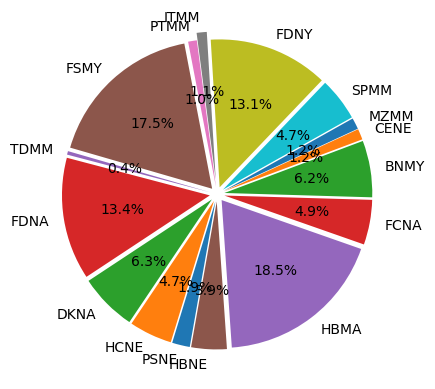

In [13]:
# ratio = [34, 32, 16, 18]
# labels = ['Apple', 'Banana', 'Melon', 'Grapes']
explode = [0.05, 0.05, 0.05, 0.05,0.05, 0.05, 0.05, 0.1,0.05, 0.05, 0.05, 0.05,0.05, 0.05, 0.05, 0.05]
# # colors = ['silver', 'gold', 'whitesmoke', 'lightgray']

A = plt.pie(group_ratio['ratio'], labels=group_ratio['그룹'].apply(lambda x : x[-5:-1]), autopct='%.1f%%', startangle=260,
        counterclock=False, explode=explode)
#         explode=explode, shadow=True)
#         , colors=colors)
# plt.show()

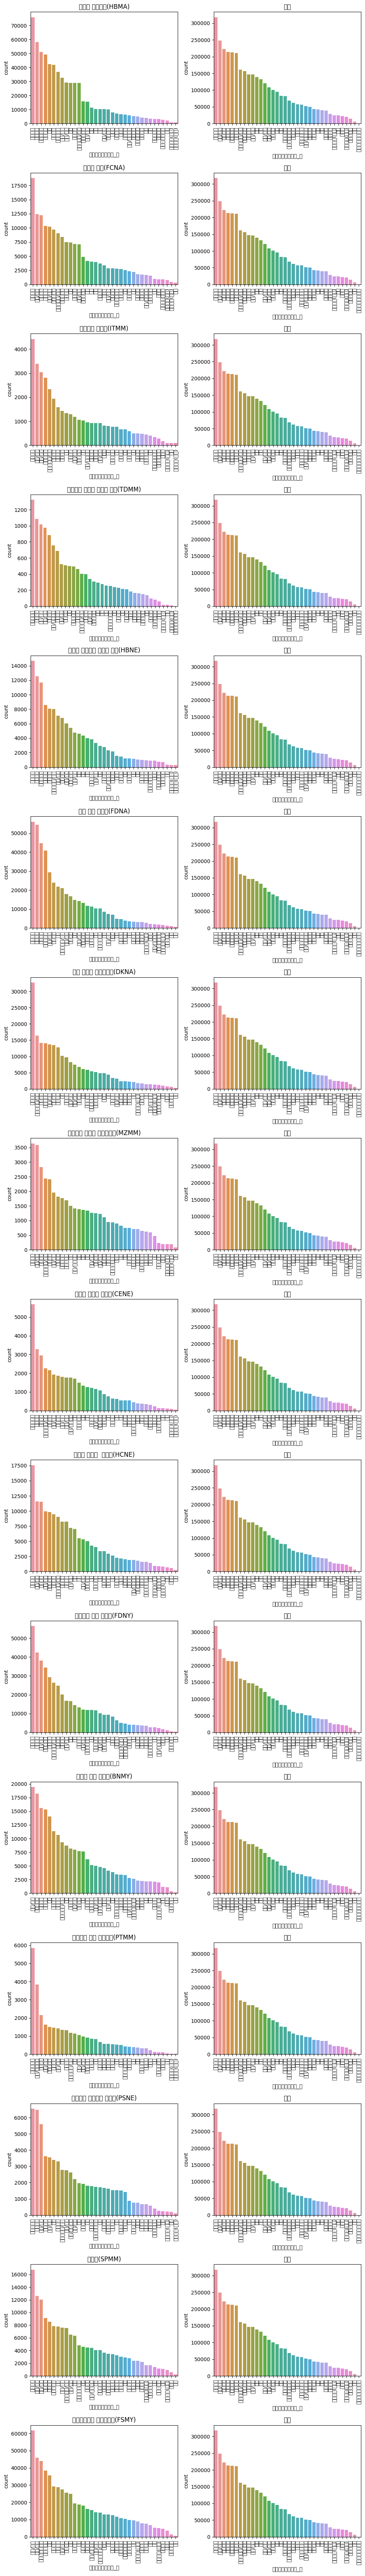

In [14]:
# for group in range(len(group_ratio['그룹'])):

plt.figure(figsize=(10,70))
group = 1
group1 = 2
for i in range(1,5):
    for j in range(1,5):
        plt.subplot(len(group_ratio['그룹']), 2, group)
        plt.xticks(rotation = 90)
        sns.countplot(x = '가맹점업종분류명_대', data = data[data['최종등급'] == f"{i}{j}"],
                order = data[data['최종등급'] == f"{i}{j}"]['가맹점업종분류명_대'].value_counts().index)
        plt.title(mapper[f"{i}{j}"])

        plt.subplot(len(group_ratio['그룹']), 2, group1)
        plt.xticks(rotation = 90)
        sns.countplot(x = '가맹점업종분류명_대', data = data, order = data['가맹점업종분류명_대'].value_counts().index)
        plt.title('전체')
        group += 2
        group1 += 2
        plt.tight_layout()
plt.show()

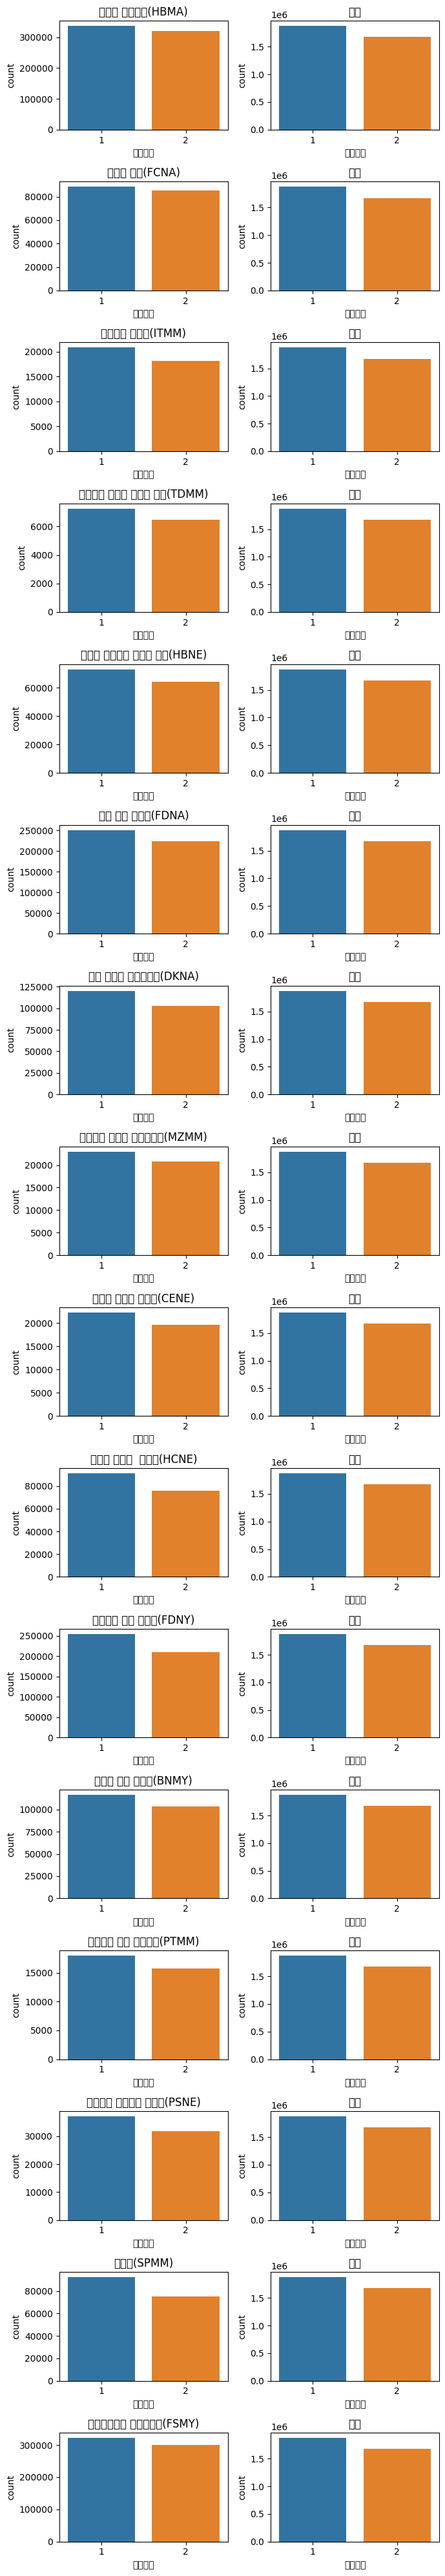

In [15]:
plt.figure(figsize=(7,40))
group = 1
group1 = 2
for i in range(1,5):
    for j in range(1,5):
        plt.subplot(len(group_ratio['그룹']), 2, group)
#         plt.xticks(rotation = 90)
        sns.countplot(x = '성별코드', data = data[data['최종등급'] == f"{i}{j}"],
                order = data[data['최종등급'] == f"{i}{j}"]['성별코드'].value_counts().index)
        plt.title(mapper[f"{i}{j}"])

        plt.subplot(len(group_ratio['그룹']), 2, group1)
#         plt.xticks(rotation = 90)
        sns.countplot(x = '성별코드', data = data, order = data['성별코드'].value_counts().index)
        plt.title('전체')
        group += 2
        group1 += 2
        plt.tight_layout()
plt.show()